<a href="https://colab.research.google.com/github/varunk04/computer_vision/blob/main/03_Tensorflow_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolution Neural Networks and Computer Vision Tensorflow:


Computer Vision is the practise of writing algorithms which can discover patterns in the images/vedios.

## Get the Data:

From the food 101 data lets take only 2 classes of data, that is STEAK & PIZZA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


# unzip the downloaded file.

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-05-18 05:14:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  15.9MB/s    in 7.8s    

2023-05-18 05:14:47 (13.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data:

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

# Walkthrough the pizza_steak directory and list the number of files:
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [25]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
# Lets visalize the images:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  #setup the target directory:
  target_folder = target_dir + "/" + target_class

  # Get the random imaeg path:
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib:
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)

  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape : {img.shape}")

  return img

['3713343.jpg']
Image shape : (512, 512, 3)


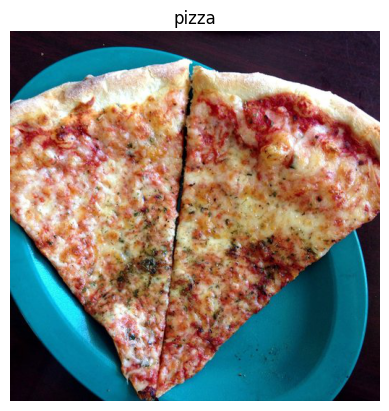

In [ ]:
# View random image from training dataset:

img = view_random_image(target_dir = 'pizza_steak/train',
                        target_class = 'pizza')

In [ ]:
import tensorflow as tf

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
# Lets normalize the image data:
img/255.0

array([[[0.12941176, 0.02745098, 0.0627451 ],
        [0.13333333, 0.03137255, 0.0745098 ],
        [0.13333333, 0.03137255, 0.0745098 ],
        ...,
        [0.1254902 , 0.06666667, 0.15686275],
        [0.14117647, 0.08235294, 0.17254902],
        [0.16078431, 0.10196078, 0.19215686]],

       [[0.1254902 , 0.01960784, 0.05490196],
        [0.1372549 , 0.02745098, 0.0745098 ],
        [0.14509804, 0.04313725, 0.08627451],
        ...,
        [0.14117647, 0.08235294, 0.17254902],
        [0.15686275, 0.09803922, 0.18823529],
        [0.17254902, 0.11372549, 0.20392157]],

       [[0.14117647, 0.02352941, 0.0627451 ],
        [0.14117647, 0.03137255, 0.07843137],
        [0.14901961, 0.03921569, 0.08627451],
        ...,
        [0.16078431, 0.10196078, 0.19215686],
        [0.17647059, 0.11764706, 0.20784314],
        [0.18823529, 0.12941176, 0.21960784]],

       ...,

       [[0.04705882, 0.00392157, 0.03529412],
        [0.04705882, 0.00392157, 0.03529412],
        [0.04705882, 0

**Normalization is the one of the common pre processing technique used in the Neural Networks**

**Normalization squashes the data in the range of [0-1].**

## An end to end CNN :

Following steps are taken:

* Load the images
* Preprocess the images
* Build the CNN modle to learn the patterns in the images
* Compile the CNN
* Fit the CNN to out Training data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed:
tf.random.set_seed(42)

# Preprocessed data (Normalization):
train_datgen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#Set up paths to our data directories:
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Import data from directories and turn it into batches:
train_data = train_datgen.flow_from_directory(directory = train_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = 'binary',
                                              seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = 'binary',
                                              seed = 42)

# Build a CNN model (same as Tiny VGG Model):
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),

    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
                               
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),

    tf.keras.layers.Conv2D(10,3,activation = 'relu'),

    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

# Compile our CNN model:

model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics= ['accuracy']
)

# Fit the model:

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 255ms/step - loss: 0.6908 - accuracy: 0.6233 - val_loss: 0.5347 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 13s 270ms/step - loss: 0.4996 - accuracy: 0.7513 - val_loss: 0.4017 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 13s 271ms/step - loss: 0.4530 - accuracy: 0.7913 - val_loss: 0.4722 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4128 - accuracy: 0.8180 - val_loss: 0.3358 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3497 - accuracy: 0.8573 - val_loss: 0.3636 - val_accuracy: 0.8260


**NOTE:** Since we have use dthe GPU accelator to train the model, the training time is significatly low compared to the normal CPU.

In [ ]:
# Get the summary:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Building a non CNN model:

Lets build a Neural Network without using a CNN layer and lets see how it performs.

In [ ]:
# Set the random_seed:
tf.random.set_seed(42)

# 1. Building the model:
model_2 = tf.keras.Sequential(
    [
      tf.keras.layers.Flatten(input_shape = (224,224,3)),
     tf.keras.layers.Dense(4, activation = 'relu'),
     tf.keras.layers.Dense(4, activation = 'relu'),
     tf.keras.layers.Dense(1, activation = 'sigmoid')
    ]
)

# 2. Compilig the model:
model_2.compile(
    loss= 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

#3. Fitting the model:
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps= len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 13s 210ms/step - loss: 0.6934 - accuracy: 0.4933 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 223ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 13s 276ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000


Compared to CNN model, this is performing very poorly with accuracy of 50% witch is as good as guessing.

In [ ]:
# Lest egt the summary of model_2:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


**NOTE :** DESPITE HAVING MORE NUMBER OF TRAINALE PARAMETRES NON CNN PERFORMED PRETTY POORLY

* Lets try to improve it.

In [ ]:
# Set the ranodm Seed:
tf.random.set_seed(42)

# 1. Creating the model:

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#2. compile the model:
model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

#3. fit the model:
history_3 = model_3.fit( train_data,
                         epochs=5,
                         steps_per_epoch = len(train_data),
                         validation_data = valid_data,
                         validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 212ms/step - loss: 5.0864 - accuracy: 0.6187 - val_loss: 0.7149 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 1.0170 - accuracy: 0.6740 - val_loss: 1.0401 - val_accuracy: 0.7140
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 1.1276 - accuracy: 0.6753 - val_loss: 0.6486 - val_accuracy: 0.7500
Epoch 4/5
47/47 [==============================] - 12s 265ms/step - loss: 0.5671 - accuracy: 0.7633 - val_loss: 0.4858 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 12s 260ms/step - loss: 0.4527 - accuracy: 0.8147 - val_loss: 0.4829 - val_accuracy: 0.7560


In [ ]:
# Lets check the summary:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


* Even though this non CNN performed better than the previous one, this has very huge number of parametres as compare dto CNN model.
* It has around 15 million parametres comapred to CNN model witch has around 30k.

## Binary Classification:

Breaking down the problem:

1. Become one with the data.
2. preprocess the data
3. create a model
4. Fit the model
5. Evaluate the model
6. Adjust the parametres
7. Repeat until satisfied.

### 1. Become one with the data:

['1312841.jpg']
Image shape : (512, 512, 3)
['3425999.jpg']
Image shape : (512, 512, 3)


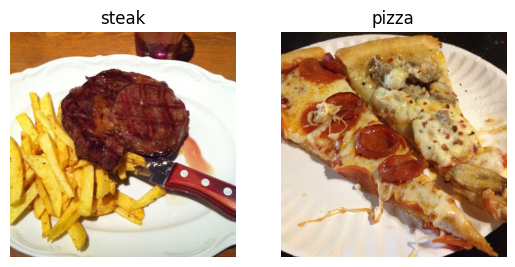

In [ ]:
# Visulaization data:

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train', 'pizza')


### 2. Preprocess the data:

In [7]:
# Define our directory dataset paths:

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Next step is specifying the **Batches**

A batch is a small subset of the data, which our model ooks at rather than looking the whole data.

It does this for couple of reasons:

1. Huge image data wont fit in the computers memory.
2. Trying to learn in whole dataset in one hit could result in overloading and results in model not being able to learn the patters.

common batch size is 32.

In [ ]:
# Create the train and test data generators and rescale the data:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches:

train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory= test_dir,
                                             target_size = (224,224),
                                             class_mode = 'binary',
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get the sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first 2 images :
images[:2], images[0].shape

(array([[[[0.40000004, 0.33333334, 0.2627451 ],
          [0.4666667 , 0.38431376, 0.30980393],
          [0.43529415, 0.34901962, 0.25882354],
          ...,
          [0.6901961 , 0.64705884, 0.7019608 ],
          [0.6745098 , 0.63529414, 0.6784314 ],
          [0.6509804 , 0.6039216 , 0.6509804 ]],
 
         [[0.47450984, 0.40784317, 0.3372549 ],
          [0.45098042, 0.3803922 , 0.3019608 ],
          [0.454902  , 0.36862746, 0.2784314 ],
          ...,
          [0.46274513, 0.49411768, 0.5372549 ],
          [0.33333334, 0.3803922 , 0.43529415],
          [0.25490198, 0.30588236, 0.36862746]],
 
         [[0.49411768, 0.40784317, 0.31764707],
          [0.47450984, 0.3803922 , 0.28627452],
          [0.5019608 , 0.40784317, 0.3137255 ],
          ...,
          [0.29803923, 0.30980393, 0.36862746],
          [0.34901962, 0.35686275, 0.4156863 ],
          [0.38823533, 0.39607847, 0.454902  ]],
 
         ...,
 
         [[0.454902  , 0.56078434, 0.59607846],
          [0.44705

In [ ]:
# View the first batch of labels:
labels

array([1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

In [3]:
# Lets create a simple model first
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation
from tensorflow.keras import Sequential

* Intially we will build a simpler model and gradually increase the complexity, since there are infinite number of architecture one could build in NN.

In [ ]:
# Create the model:
model_4 = Sequential([
    Conv2D(filters =  10,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           activation = 'relu',
           input_shape = (224,224,3)),
    Conv2D(10,3,activation = 'relu'),
    Conv2D(10,3,activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
# Compile the model:
model_4.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

### 4. Fit the model:

In [ ]:
# Fit the model:

history_4 = model_4.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 22s 255ms/step - loss: 0.6828 - accuracy: 0.6467 - val_loss: 0.4416 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 11s 224ms/step - loss: 0.4059 - accuracy: 0.8327 - val_loss: 0.3916 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.2904 - accuracy: 0.8960 - val_loss: 0.3705 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.1530 - accuracy: 0.9507 - val_loss: 0.5966 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 11s 228ms/step - loss: 0.0679 - accuracy: 0.9840 - val_loss: 0.4903 - val_accuracy: 0.8100


### 5. Evaluate the Model:

<Axes: >

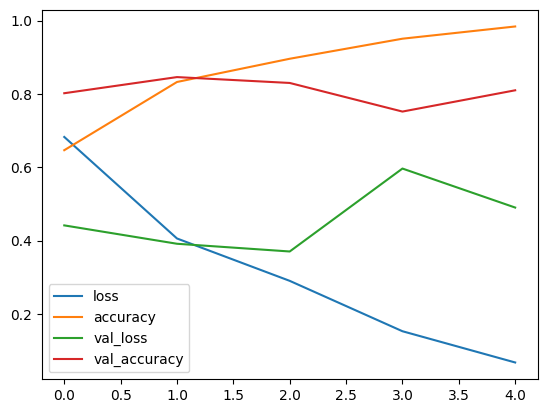

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot()

In [4]:
# Plot the validation and training data separately:

def plot_loss_curve(history):
  """
  Returns seperate loss curves for training and validation sets
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
  
  # Plot the loss:
  plt.figure(figsize = (12,8))
  plt.plot(epochs, loss, label = 'Training_loss')
  plt.plot(epochs, val_loss, label = 'Val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #Plot the accurcay:
  plt.figure(figsize = (12,8))
  plt.plot(epochs, accuracy, label = 'Training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'Val_laccuracy')
  plt.title('accuracy')
  plt.xlabel('Epochs')
  plt.legend()

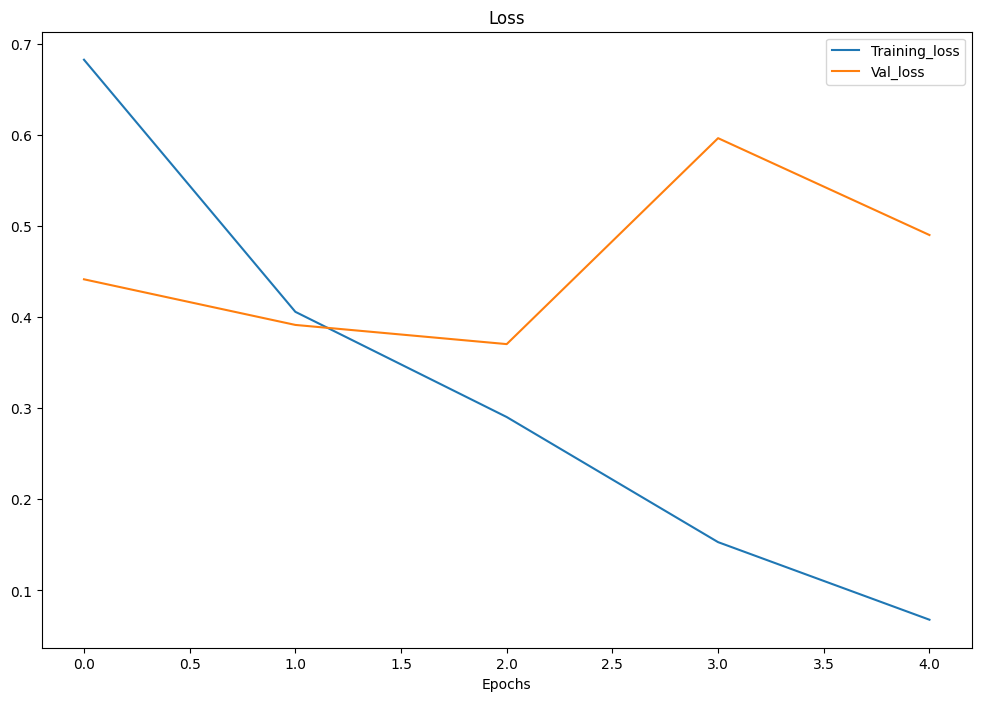

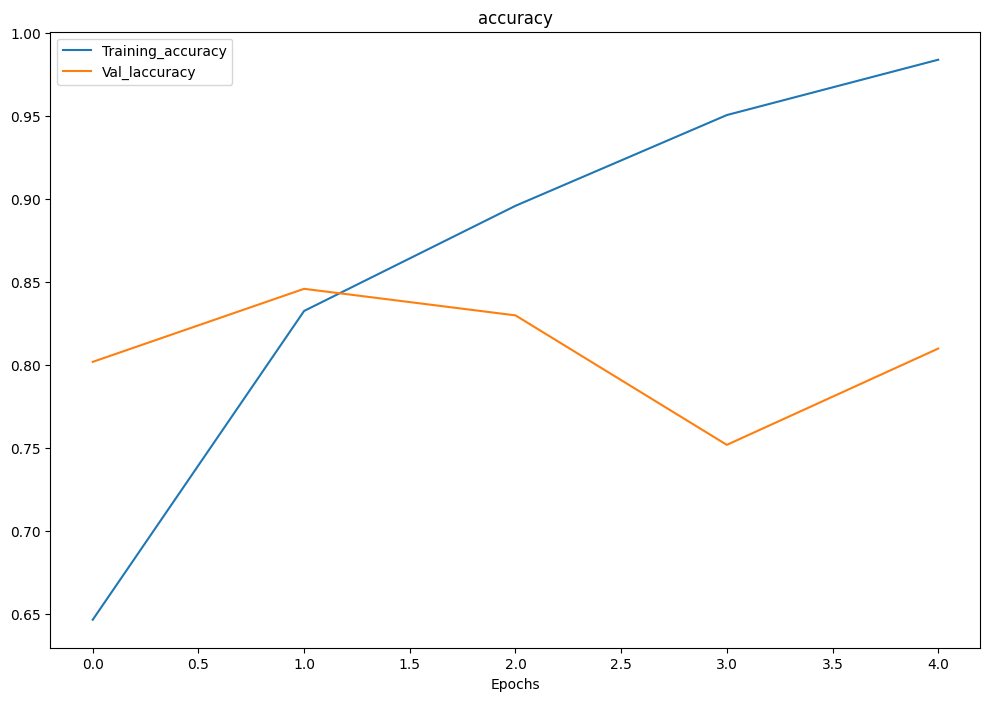

In [ ]:
# Check out the loss and accuracy of our baseline model:
plot_loss_curve(history_4)

**NOTE:** Idelly both the losses train and validation losses should be same, if there is huge difference then it means there is **OVERFITTING**

### 6. Adjust the model parametres:

Fittig a ML model comes in 3 steps:

0. Create a baseline model
1. Beat the baseline model 
2. Reduce overfitting.

Overfitting can be prevented by doing the following:

* Add data augementation
* Add the regularization layer(such as MaxPool2D)
* Add more data, etc...

In [ ]:
# Creat the model:
model_5 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
# Compile the model:
model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [ ]:
# Fit the mdoel:
history_5 = model_5.fit(
                          train_data,
                          epochs = 5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 12s 219ms/step - loss: 0.6169 - accuracy: 0.6407 - val_loss: 0.5047 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4738 - accuracy: 0.7827 - val_loss: 0.3941 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4135 - accuracy: 0.8233 - val_loss: 0.3279 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3833 - accuracy: 0.8373 - val_loss: 0.3335 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3588 - accuracy: 0.8473 - val_loss: 0.3118 - val_accuracy: 0.8640


In [ ]:
# Lets check the summary:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
# lest check our baselien model:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


model_4 has around 477k parametres where as model_5 has only 8k parametres and despite that it has perfermored better than our basline model, that is the importance of the **MAXPOOLING LAYER**.

* It regularizes the matrix by seletcing only important or max value from the pool.

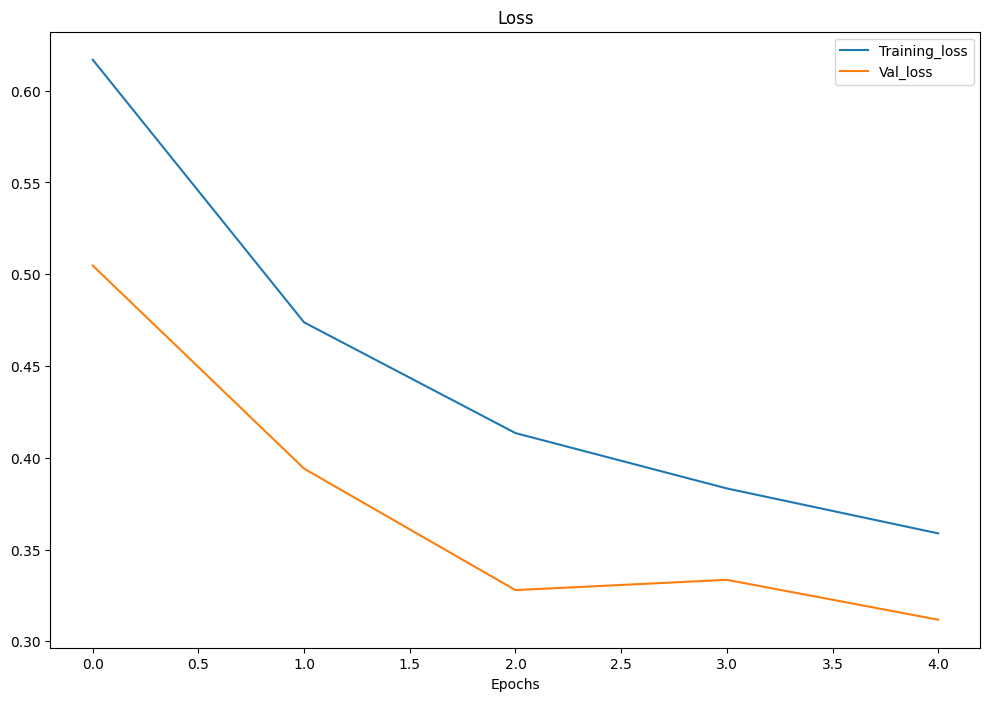

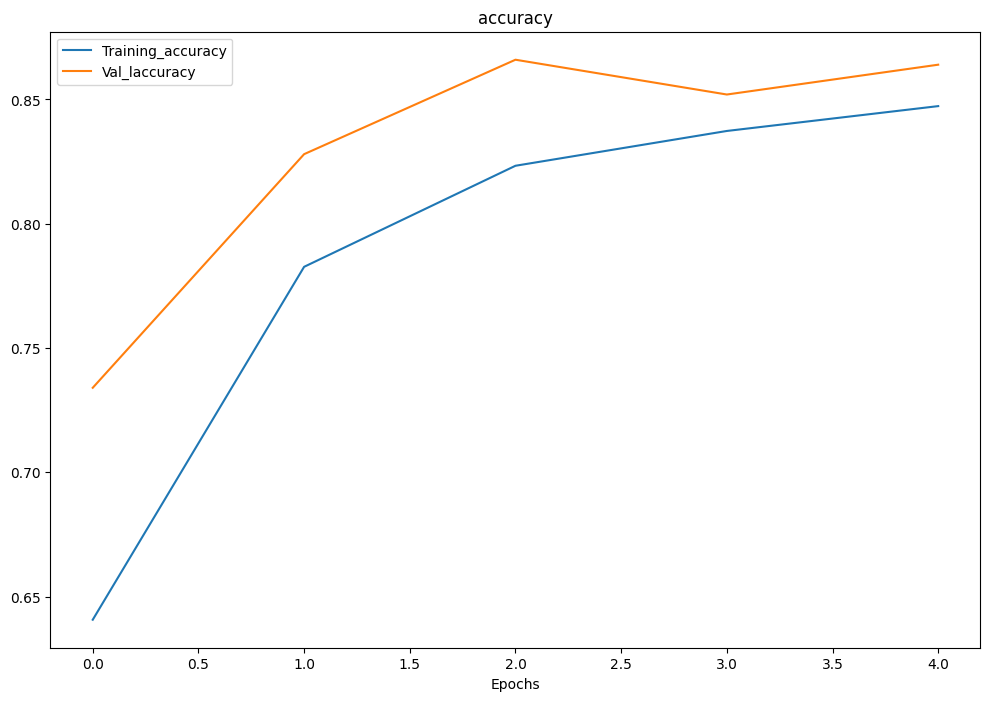

In [ ]:
# Lets check the loss and accuracy curves of the model_5:
plot_loss_curve(history_5)

### Data Augmentation:

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Create ImageDataGenrator training instance:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                    rotation_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.3,
                                    horizontal_flip = True)

# Create ImageDataGenerator without data Augmentation:
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data Augmentation:
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [8]:
# Lets visualize the data Augmentation:

print('Augmeented training data')

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (224,224),
                                                                  class_mode = 'binary',
                                                                  shuffle = False)

print('Non - Augmeented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               shuffle = False)

print('Non Augmented testing data')
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224,224),
                                            class_mode = 'binary',
                                            )

Augmeented training data
Found 1500 images belonging to 2 classes.
Non - Augmeented training data
Found 1500 images belonging to 2 classes.
Non Augmented testing data
Found 500 images belonging to 2 classes.


**NOTE:** Usualy Augmentation is performed on training data. USing ImageDataGenerator build in data augmentation parametres our images are left as they are in the directories but are modifies as they are loaded into the model.

In [9]:
# get soem sample augmented data:

images,labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

<Figure size 640x480 with 0 Axes>

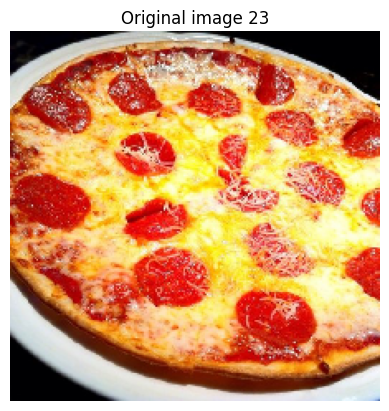

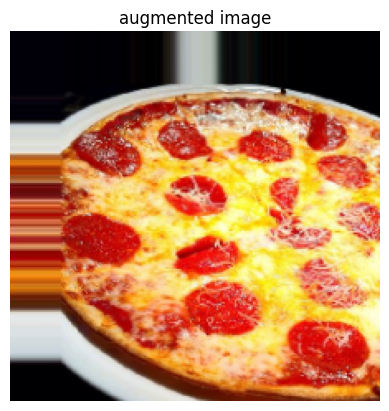

<Figure size 640x480 with 0 Axes>

In [ ]:
# Show the original image and augmented image:

import random
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f'Original image {random_number}')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('augmented image')
plt.axis(False)
plt.figure()

Lets Create the CNN with augmented Data.

In [ ]:
# create the model:

model_6 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model:

model_6.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

# Fit the model:
history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))


Epoch 1/5
47/47 [==============================] - 25s 498ms/step - loss: 0.6975 - accuracy: 0.5420 - val_loss: 0.6841 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 24s 508ms/step - loss: 0.7020 - accuracy: 0.5807 - val_loss: 0.6597 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 24s 501ms/step - loss: 0.6974 - accuracy: 0.5213 - val_loss: 0.6664 - val_accuracy: 0.6920
Epoch 4/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6798 - accuracy: 0.5827 - val_loss: 0.6117 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6747 - accuracy: 0.6267 - val_loss: 0.6425 - val_accuracy: 0.6780


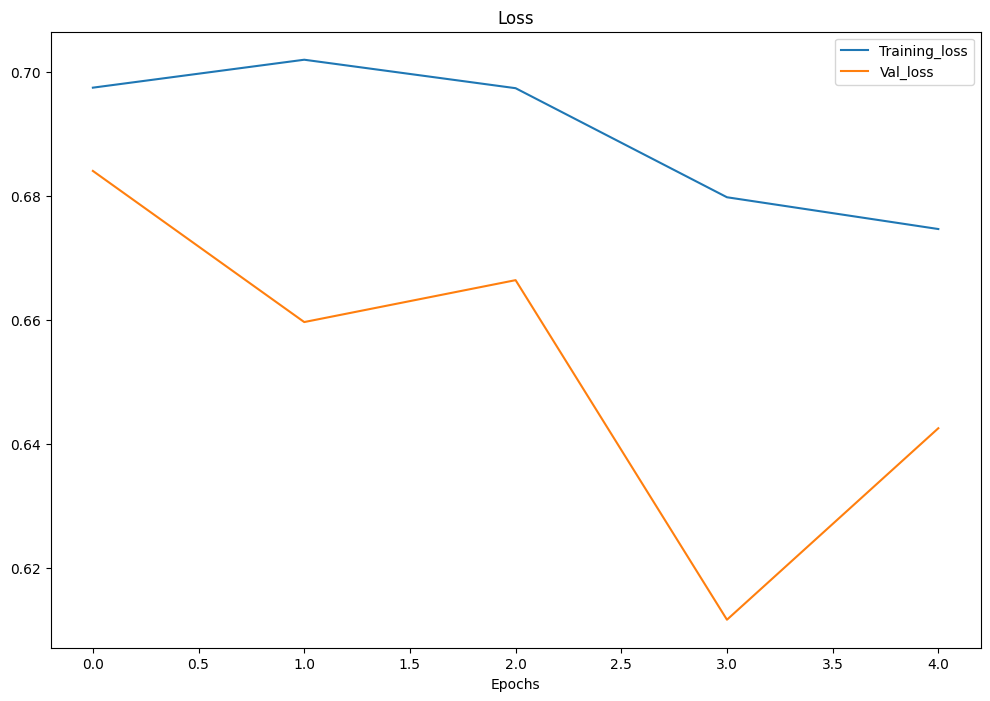

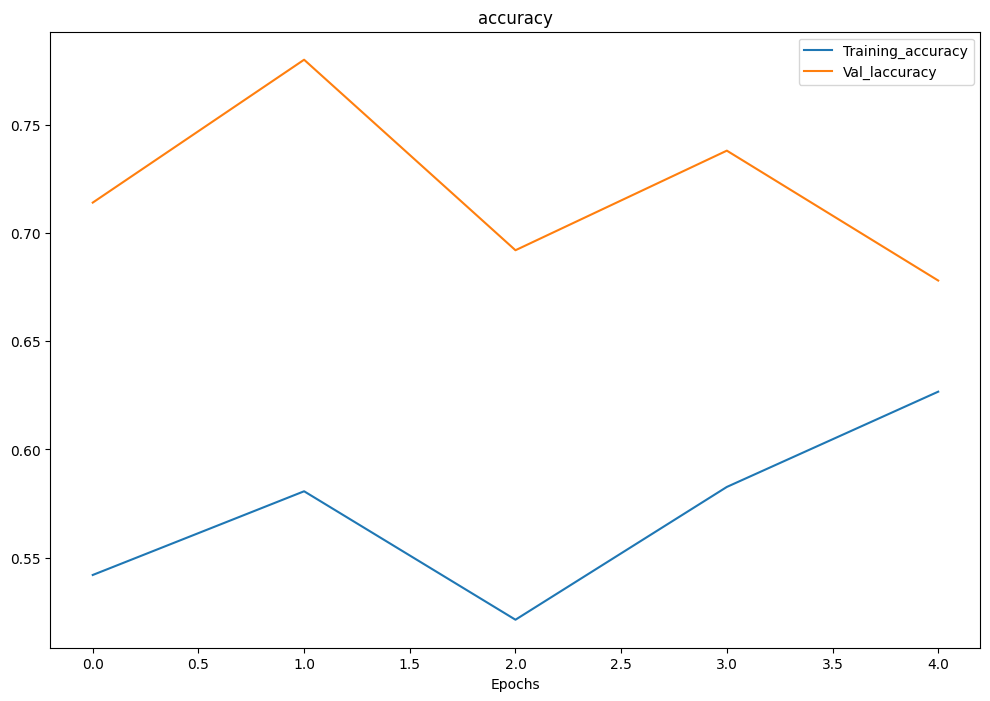

In [ ]:
# Plot te loss curves :
plot_loss_curve(history_6)

EVen though we auugment the dtaa, still there is no improvement in the results as augmentaion increases the train ing samples and it may results in the poor performance.

But lets try to imrpve the model performance by using the usual tricks.

In [10]:
# import data and augment it an shuffle from training directory:

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   class_mode = 'binary',
                                                                   shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Lest create mode, same as model_5 and model_6:

model_7 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model:
model_7.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)
# fit the model:
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 39s 561ms/step - loss: 0.6455 - accuracy: 0.6180 - val_loss: 0.5348 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 27s 575ms/step - loss: 0.5849 - accuracy: 0.6840 - val_loss: 0.4566 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 27s 566ms/step - loss: 0.5158 - accuracy: 0.7547 - val_loss: 0.4146 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 26s 563ms/step - loss: 0.4914 - accuracy: 0.7753 - val_loss: 0.3325 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 26s 556ms/step - loss: 0.4609 - accuracy: 0.7953 - val_loss: 0.3372 - val_accuracy: 0.8540


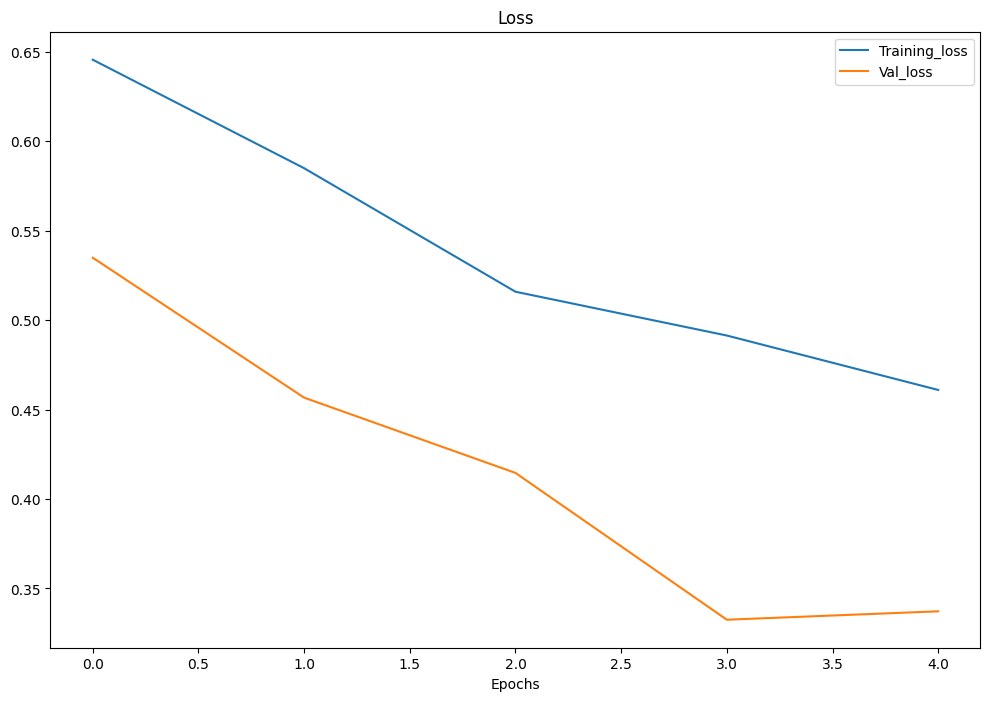

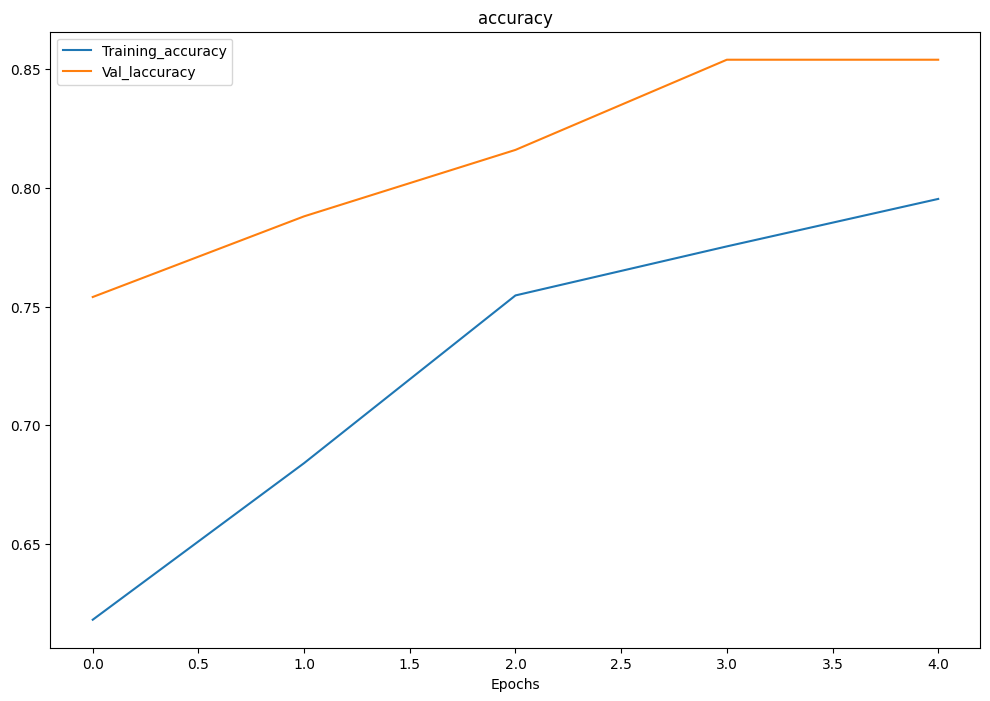

In [ ]:
# Lets plot the loss curves :
plot_loss_curve(history_7)

Now this looks better than the previous one, so simple shuffling has increased our models accuracy by good number.

### 7. Lets repeat untill we are satisfied with the results of the model:

There are few more things we can try to continue to improve our model:

* Incerese the model layers.
* Increase the number of fiters
* Increase the training time.

In [16]:
# Lets build another model with some chanegs to it:

model_8 = Sequential([
    Conv2D(32,3, activation = 'relu', input_shape = (224, 224, 3)),
    Conv2D(32, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(32, 3, activation = 'relu'),
    Conv2D(32, 3, activation = 'relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model:
model_8.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

# Fit the model:
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs = 10,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))                      

Epoch 1/10
47/47 [==============================] - 30s 569ms/step - loss: 0.5983 - accuracy: 0.6887 - val_loss: 0.3711 - val_accuracy: 0.8480
Epoch 2/10
47/47 [==============================] - 27s 567ms/step - loss: 0.5149 - accuracy: 0.7527 - val_loss: 0.3888 - val_accuracy: 0.8460
Epoch 3/10
47/47 [==============================] - 27s 567ms/step - loss: 0.4896 - accuracy: 0.7620 - val_loss: 0.3547 - val_accuracy: 0.8520
Epoch 4/10
47/47 [==============================] - 27s 574ms/step - loss: 0.4663 - accuracy: 0.7893 - val_loss: 0.3480 - val_accuracy: 0.8480
Epoch 5/10
47/47 [==============================] - 27s 570ms/step - loss: 0.4496 - accuracy: 0.7960 - val_loss: 0.3954 - val_accuracy: 0.8100
Epoch 6/10
47/47 [==============================] - 27s 568ms/step - loss: 0.4853 - accuracy: 0.7733 - val_loss: 0.3677 - val_accuracy: 0.8420
Epoch 7/10
47/47 [==============================] - 27s 573ms/step - loss: 0.4894 - accuracy: 0.7667 - val_loss: 0.3551 - val_accuracy: 0.8600

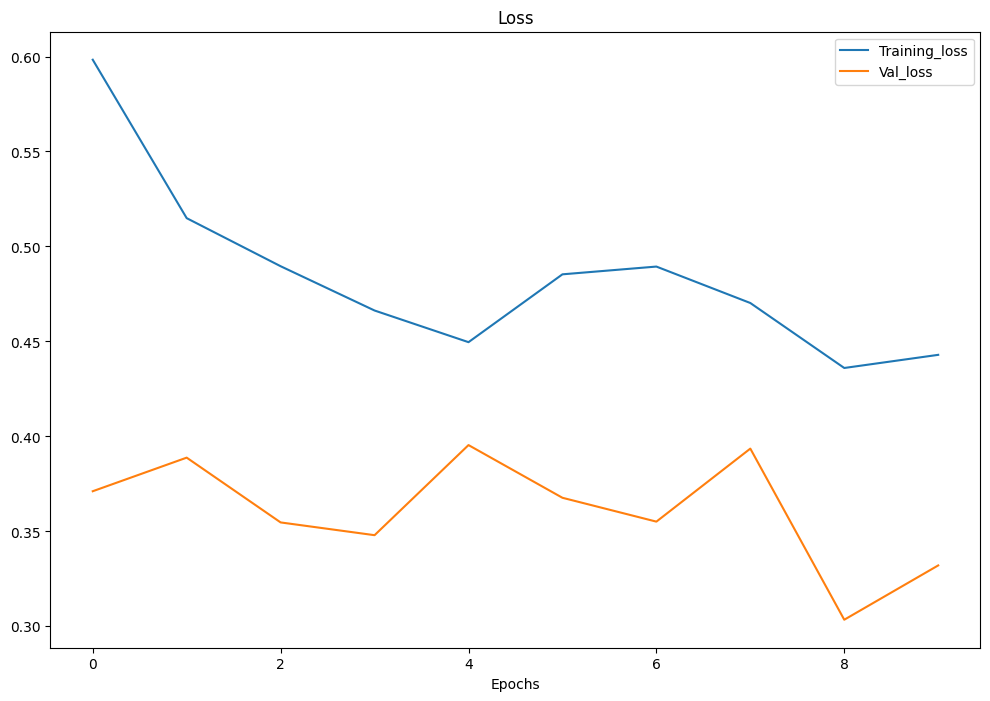

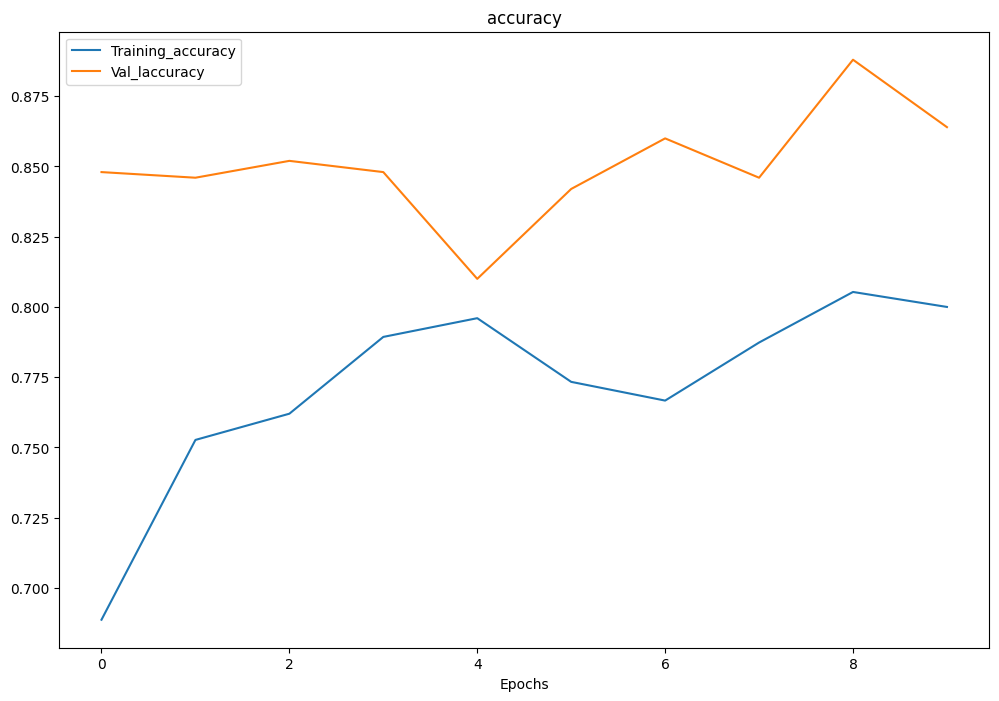

In [17]:
plot_loss_curve(history_8)

In [18]:
model_8.evaluate(test_data)

16/16 [==============================] - 3s 154ms/step - loss: 0.3321 - accuracy: 0.8640


[0.33209142088890076, 0.8640000224113464]

Modified model has better accuracy than the previous one, showing there is some effect when we augemnt the data and add few extra filters to our CNN.

## Making a prediction with our trained model with our custom data:

When we want to test our model with our custom data, we have to preprocess the image and reshape it to the shape that our model takes.

In [19]:
# Cretae a function to import image and resize it to be able to be used with our model:

def load_and_prep_image(filename,img_shape = 224):
  """
  Reads in the image from the filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, color_channel).
  """
  # read the image:
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor:
  img = tf.image.decode_image(img)
  # Resize the image :
  img = tf.image.resize(img, size =[img_shape, img_shape])
  # Rescale the image (normalization):
  img = img/255.

  return img

In [20]:
# Load in the image and preprocess the img.

pizza = load_and_prep_image('/content/download.jpg')
pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.8521446 , 0.42346814, 0.39632353],
        [0.7957108 , 0.34246323, 0.3226103 ],
        [0.70845586, 0.23137255, 0.22046569],
        ...,
        [0.4884804 , 0.34099266, 0.28235295],
        [0.48235294, 0.33333334, 0.28835785],
        [0.48235294, 0.33333334, 0.2901961 ]],

       [[0.84666055, 0.4242516 , 0.38770568],
        [0.84526324, 0.3982832 , 0.36902902],
        [0.7574208 , 0.2853808 , 0.2650727 ],
        ...,
        [0.569958  , 0.42437986, 0.36001125],
        [0.5638305 , 0.41554537, 0.36356795],
        [0.5638305 , 0.4148109 , 0.3654062 ]],

       [[0.8787853 , 0.4764156 , 0.421855  ],
        [0.89680797, 0.4698264 , 0.4231689 ],
        [0.858054  , 0.3936403 , 0.35996392],
        ...,
        [0.6256157 , 0.47733855, 0.40892118],
        [0.62865895, 0.47733855, 0.4189951 ],
        [0.62865895, 0.47703078, 0.42083332]],

       ...,

       [[0.608467  , 0.48493588, 0.38411894],
        [0.60

In [24]:
# Lets pass in this to our trained model and predict it:

pred = model_8.predict(tf.expand_dims(pizza, axis = 0))

1/1 [==============================] - 0s 28ms/step


Thats the prediction probabilty of a class.

Lets write a another helper function to display the predicted image with class name.

In [26]:
pred_class = class_names[int(tf.round(pred))]

pred_class

'pizza'

In [27]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports the image located at the filename, make a predictions with the model
  and plots the image with the predicted class as the title
  """

  # Import the image
  img = load_and_prep_image(filename)

  # Make the predictions:
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Get the predicted class:
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image with class name:
  plt.imshow(img)
  plt.title(f'precidiction : {pred_class}')
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


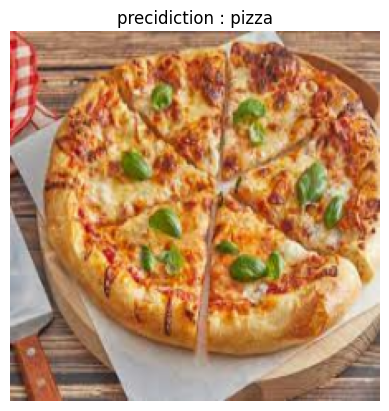

In [28]:
# Test our model on our custom image:
pred_and_plot(model_8, '/content/download.jpg')

Lets use teh helper function on another picture which i have downloaded from the internet


1/1 [==============================] - 0s 21ms/step


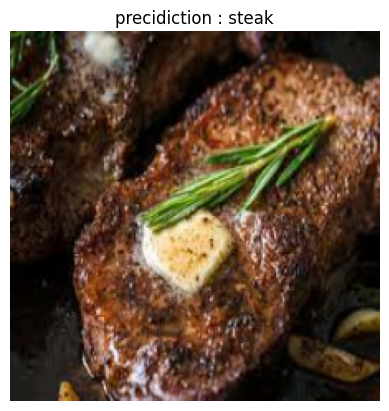

In [29]:
pred_and_plot(model_8, '/content/steak.jpg')

Awsome it is able to predict the pictures whether it is pizza and steak.